In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression ,  Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings
from sklearn.model_selection import train_test_split


In [23]:
# import the csv data
df = pd.read_csv('data/stud.csv')

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
# preparing x and y variables

x =df.drop(columns=['math_score'],axis=1)

In [26]:
y = df['math_score']

In [27]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [28]:
print("categories in 'gender' variable :       ",end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable :       ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' variable :       ",end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'test_preparation_course' variable :       ",end=" ")
print(df['test_preparation_course'].unique())

print("categories in 'lunch' variable :       ",end=" ")
print(df['lunch'].unique())

categories in 'gender' variable :        ['female' 'male']
categories in 'race_ethnicity' variable :        ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable :        ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'test_preparation_course' variable :        ['none' 'completed']
categories in 'lunch' variable :        ['standard' 'free/reduced']


In [29]:
# creae a column transformer with 3 types of transformers
num_feature = x.select_dtypes(exclude='object').columns 
cat_feature = x.select_dtypes(include='object').columns   

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer ([
    ("onehotencoder",oh_transformer,cat_feature),
    ("standardscaler",numeric_transformer,num_feature)
])

In [30]:
x = preprocessor.fit_transform(x)

In [31]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [32]:
# seperate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)
x_train.shape , y_train.shape

((800, 19), (800,))

#### create an evaluation function to give all metrics after model training

In [40]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true , predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse,r2_square


In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbours Regressior" : KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}

model_list = []
r2_list= []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # train model

    # make predictionsf
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 =  evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 =  evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for train set')
    print("Root Mean squred error: {:.4f}".format(model_train_rmse))
    print("Mean absolute error: {:.4f}".format(model_train_mae))
    print("R2 score: {:.4f}".format(model_train_r2))

    print('------------------------------------')

    print('Model Performance for test set')
    print("Root Mean squred error: {:.4f}".format(model_test_rmse))
    print("Mean absolute error: {:.4f}".format(model_test_mae))
    print("R2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

Linear Regression
Model Performance for train set
Root Mean squred error: 5.3243
Mean absolute error: 4.2671
R2 score: 0.8743
------------------------------------
Model Performance for test set
Root Mean squred error: 5.3960
Mean absolute error: 4.2158
R2 score: 0.8803
Lasso
Model Performance for train set
Root Mean squred error: 6.5938
Mean absolute error: 5.2063
R2 score: 0.8071
------------------------------------
Model Performance for test set
Root Mean squred error: 6.5197
Mean absolute error: 5.1579
R2 score: 0.8253
Ridge
Model Performance for train set
Root Mean squred error: 5.3233
Mean absolute error: 4.2650
R2 score: 0.8743
------------------------------------
Model Performance for test set
Root Mean squred error: 5.3904
Mean absolute error: 4.2111
R2 score: 0.8806
K-Neighbours Regressior
Model Performance for train set
Root Mean squred error: 5.7077
Mean absolute error: 4.5167
R2 score: 0.8555
------------------------------------
Model Performance for test set
Root Mean squr

In [43]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 score']).sort_values(by=["R2 score"],ascending=False)

,Model Name,R2 score
2,Ridge,0.880593
0,Linear Regression,0.880345
8,AdaBoost Regressor,0.853440
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.849712
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbours Regressior,0.783813
4,Decision Tree,0.758526


### Linear Regression

In [45]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of model is %.2f" %score)

Accuracy of model is 88.03


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

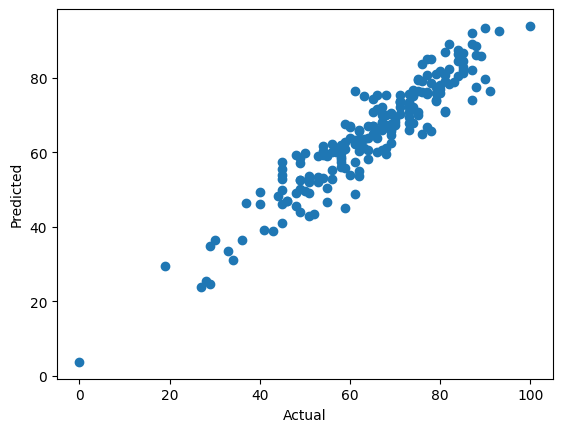

In [46]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

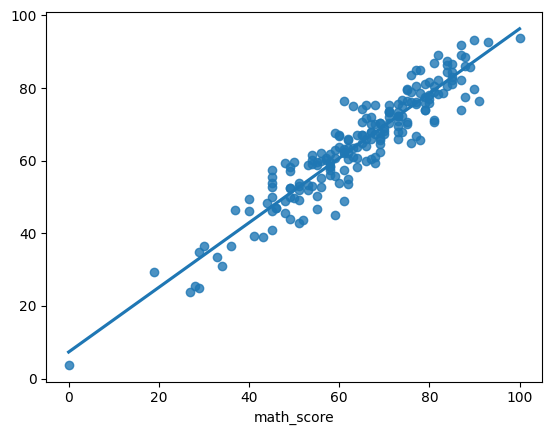

In [47]:
sns.regplot(x=y_test,y=y_pred,ci=None)

### Difference between actual and predicted values

In [48]:
pred_df = pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
